# Module 3 Lab - Inference - Solution

In [1]:
% matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

In [2]:
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

sns.set(style="whitegrid")

## Directions

**Failure to follow the directions will result in a "0"**

The due dates for each are indicated in the Syllabus and the course calendar. If anything is unclear, please email EN605.448@gmail.com the official email for the course or ask questions in the Lab discussion area on Blackboard.

The Labs also present technical material that augments the lectures and "book".  You should read through the entire lab at the start of each module.

### General Instructions

1.  You will be submitting your assignment to Blackboard. If there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.
    
    * do **not** use absolute paths in your notebooks. All resources should appear in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    
2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

## Bayesian Inference

Really, there are only a few classical problems in statistical inference. However, we use the Bayes Theorem as the basis for solving all of them:

$$P(H|D) = \frac{P(D|H)P(H)}{P(D)}$$

You only need to identify what $H$ relates to...what is it? Is it some parameter of a distribution? Some property of a model (coefficients, error rate, etc.). For some formulations, we are more specific and specify $H$ as some parameter or parameters, $\theta$:

$$P(\theta|D) = \frac{P(D|\theta)P(\theta)}{P(D)}$$

In the text we saw how we could estimate the posterior distribution using four methods: Grid, Exact, Monte Carlo and Bootstrap. For this Lab, we'll concentrate on the Bootstrap method for the reasons specified in the text.

## Statistical inference of a proportion in a Bernoulli Trial

**1\. Suppose we have a coin that shows up heads 60% of the time ($\theta=p=0.6$). Generate 100 samples from this Binomial distribution (either as True/False or 1/0).**

In [3]:
np.random.seed([1244875])

theta = 0.6
data = [1 if np.random.rand() < theta else 0 for _ in range( 100)]
print( data[0:20])

[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]


This is the synthetic data. At this point, we pretend that this is data we collected from the real world and we have no idea what $\theta$ really is. 

Understanding that inference is not certain, our goal is to make inferences about this parameter's value using this data we just "collected." Normally, the first thing we do is just calculate the parameter from our data. An *estimate* of some real world parameter is often given a "hat", for example $\theta$ becomes $\hat{\theta}$. Sometimes, it goes from Greek to Latin as in $\sigma$ to $s$ and sometimes it gets an adornment as well as in $\mu$ to $\bar{x}$.

**2\. Calculate $\hat{theta}$.**

In [4]:
theta_est = np.mean( data)
print( theta_est)

0.67


But we know that this $\hat{\theta}$ is not necessarily the "true" value. We want to know all the values that are supported by the data we collected and the degree to which they are supported...how confident we are in them. This is basically what we get when we calculate a posterior distribution over $\theta$ based on the data.

And this is where the **(Non-Parameteric Bayesian) Bootstrap** estimate of that posterior distribution comes in. In the text we established *theoretically* how we went from a single data set to an estimate of the posterior distribution of our parameters. Now we're going to do it for reals.  Use the data we have to "bootstrap" an estimate of the posterior probability distribution over $\theta$, $P(\theta|D)$ which is "given the data we observed, how much are we to believe in the various values of $\theta$ and how much should we believe in them?" Remember that belief is quantified as probability.

**3\. Generate the Bootstrap of the posterior distribution of $\hat{\theta}$ and answer the following questions:**

First, we write a simple function to do our bootstrap sampling for us. It takes the data, a metric function and the number of bootstrap samples as the arguments. A metric function can be anything we like but it will most likely be something like `np.mean`, `np.var`, etc., it is whatever function we use to calculate our parameter/statistics.

In [5]:
def bootstrap_sample( data, f, n=100):
    result = []
    m = len( data)
    for _ in range( n):
        sample = np.random.choice( data, len(data), replace=True)
        r = f( sample)
        result.append( r)
    return np.array( result)

Now we used the function by supplying the data we "collected", our metric function `np.mean` and indicate we want 1000 bootstrap samples. This returns the data we can use as our posterior distribution of the proportion.

In [6]:
posterior = bootstrap_sample( data, np.mean, 1000)

If we like, we can plot a histogram of this posterior distribution:

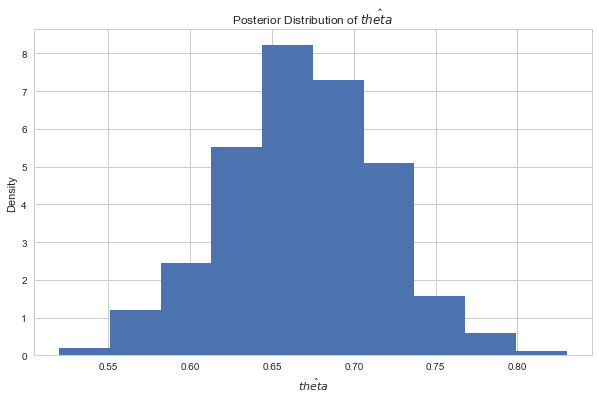

In [7]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of $\hat{theta}$")

plt.show()
plt.close()

Note that while the data is discrete and boolean (true/false), the parameter $\theta$ is continuous. You might also notice that our distribution appears to be normally distributed. Based on the Central Limit Theorem, this is what we'd expect.

**4\. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$? Interpret it.**

Although we'll often plot the posterior distribution, the real payoff from having it is to be able to do computations with it. There are a number of functions we can use for that purpose, for example, `mquantiles`. `mquantiles` is normally used to summarize the distributions of data but in this case, our data is estimates of $\theta$.

In [8]:
stats.mstats.mquantiles( posterior, [0.05, 0.95])

array([ 0.59,  0.74])

An important part of Data Science and assignments in this course is interpreting the results. This is not purely a coding class. Therefore, you should always, *always* interpret your results:

There is a 90% probability that the value of $\theta$ is between 0.59 and 0.74 based on the data.

Of course, there's nothing magical about only looking at the 90% confidence/credible interval and you can look at other ranges of interest as well.

**5\. In Bayesian Statistics, we often identify a range of possible values for a parameter that we consider the same. This is known as the ROPE (Region of Practical Equivalance). We know that a fair coin would have $\theta$ of 0.5 but we're unlikely to get an exact value of 0.5 from our data. If the ROPE is 0.48-0.52, what is the probability that our coin's $\theta$ lies in that range and is thus "fair"?**

In [9]:
np.mean((0.48 <= posterior) & (posterior <= 0.52))

0.002

One of the downsides to the Boostrap approach is that we do not follow "Cromwell's Dictum" and we can get events with zero probability. We should just interpret these events are really have very small probabilities.

Of course, now that we have this posterior distribution we can answer all kinds of (possibly) interesting and relevant questions to our problem. Let's stick with the basics, for now.

## Exercises

**Exercise 1.**

In addition to estimates of the posterior distribution of parameters such as $\theta$, we are often interested in the posterior distribution of the *difference* of two $\theta$s. For example, we might be interested in the proportion of men who smoke versus the proportion of women who smoke.

We can model $\theta_{men}$ and $\theta_{women}$ just as if they were coin biases and generate synthetic data just as if they were coin flips. Using the Non-Parametric Bootstrap, we can generate posterior distributions for $\hat{\theta}_{men}$ and $\hat{\theta}_{women}$ as well as $d$, the *difference*.

These are the steps:

1. Generate synthetic data for using $\theta_{men}$ = 0.23 and $\theta_{women}$ = 0.34,  with 100 observations each.
2. Generate the bootstrap data for each.
3. Generate difference data. You can do this by simply subtracting, element by element, one bootstrap sample from the other, $\theta_{men}$ - $\theta_{women}$.
4. Plot the distributions of all three.
5. Calculate the 90% Bayesian Confidence Interval of all three **and interpret them**.
6. Determine a ROPE for the difference and tell me what's the probability that the "true" value of the difference falls in the ROPE.

Use as many Markdown Cells and Code Cells as you need; it should look nice (not like a ransom note).

**Step 1. Generate the synthetic data.**

Note that in this case I just generate *exact* data with the values we want. You can't always do this but for most problems involving boolean values (live/die, for/against, etc.), we can generate the data explicitly.

This just shows you another way to do it.

In [10]:
np.random.seed([9235274])

men_theta = 0.23
men_data = [1] * 23 + [0] * 77
np.random.shuffle( men_data)
print( "men's data: ", men_data[0:20])

women_theta = 0.34
women_data = [1] * 34 + [0] * 66
np.random.shuffle( women_data)
print( "women's data: ", women_data[0:20])

men's data:  [0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1]
women's data:  [1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0]


This isn't really a step in inference at all. This is just to generate data that either that we would already have or, if we didn't have access to the raw data (for example, from a journal article or a newpaper story), it is data that matches the characteristics of the data in the articl or story.

The first thing we should do is to see what the main statistics of this data is. This is where the *meaningful* part comes from. Based on how we derived it, it should be exactly what we want:

In [11]:
mens_mean = np.mean( men_data)
print( "men's mean=", mens_mean)
womens_mean = np.mean( women_data)
print( "women's mean=", womens_mean)
print( "difference=", mens_mean - womens_mean)

men's mean= 0.23
women's mean= 0.34
difference= -0.11


The men's mean is 11% below the women's mean, as we saw at the start.

**Step 2\. Generate the bootstrap data for each**

This begins the actual inference step. The Bootstrap samples are an estimation of the posterior distribution, usually arrived at using Bayes Rule:

In [12]:
men_posterior = bootstrap_sample( men_data, np.mean, 1000)
women_posterior = bootstrap_sample( women_data, np.mean, 1000)

**Step 3. Calculate the difference.**

Each element of each posterior is just a different possible theta. If we match each of the possible thetas by index, we have a possible index. As a result, we have generated a bootstrap sample of the *differences*.

In [13]:
difference = men_posterior - women_posterior

**Step 4. Plot the posterior distributions**

The `hist` plotting function will take of turning the raw observations of $\theta$s and difference into an actual probability distribution (density).

We can actually plot these side by side by adjusting the number of plots in the `add_subplot` command:

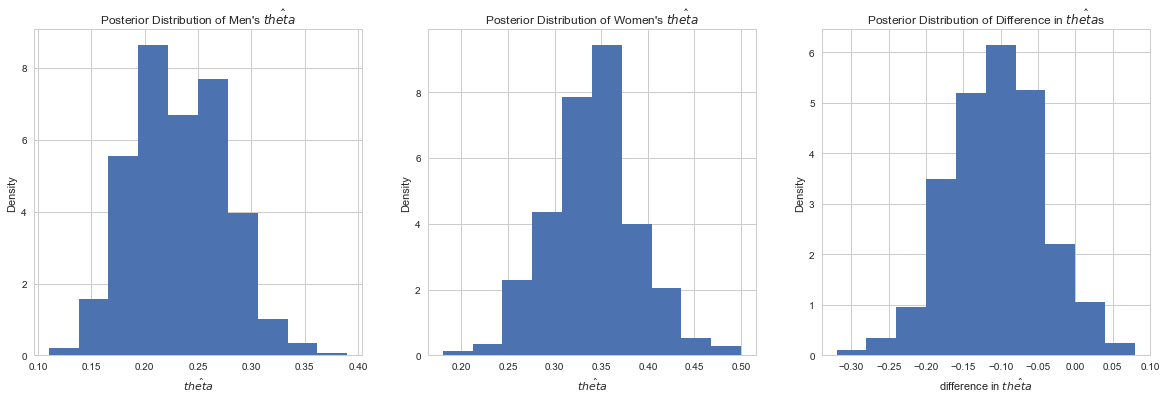

In [14]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( men_posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Men's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( women_posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of Women's $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

**Step 5**

In [15]:
print( "90% BCI for men's theta:", stats.mstats.mquantiles( men_posterior, [0.05, 0.95]))
print( "90% BCI for women's theta:", stats.mstats.mquantiles( women_posterior, [0.05, 0.95]))
print( "90% BCI for difference:", stats.mstats.mquantiles( difference, [0.05, 0.95]))

90% BCI for men's theta: [ 0.1641  0.3   ]
90% BCI for women's theta: [ 0.26  0.42]
90% BCI for difference: [-0.21  0.  ]


The BIC or Bayes Confidence Interval or Credible Interval (or sometimes when it's obvious, just Confidence Interval. Andrew Gelman often does this) is range of theta values (means and difference in this case) that contain 90% of the probability density/mass.

Based on the data (and the priors), there is a 90% probalility that the men's percentage is between 16 and 30%. There is a 90% probability that the women's percentage is between 26 and 42%. Finally, there is a 90% chance that the difference between the two percentages/rates is -21 to 0 percentage *points*.

** Step 6 **

Again, what difference is and is not significant will generally be problem specific. If we think about this problem, and someone reported something in the newspaper and you saw "20% of men and 21% of women", you'd probably be inclined to think that those aren't very different. Suppose you thought non-smoking campaigns might need to be gender based. Would that difference encourage you? What about 5 percentage points? Given the cost of different campaigns, I would be inclined to think that a difference of 10 percentage points at least would be necessary.

So let's define a ROPE of about 9-11% percent for the difference in absolute terms. Since we know that the men's rate appears to be lower, we're trying to see the probability that the difference is between (-11, -9) percent:

In [16]:
np.mean((-0.11 <= difference) & (difference <= -0.09))

0.14199999999999999

So there's only a 14.2% probability that the men's rate is really as much as 9 to 11 percentage points lower, given the data and priors. This might be our initial report. We can also report on things like, what is the probability that the difference is less than 0?

In [17]:
np.mean(difference<0)

0.94799999999999995

so the probability that the difference less than zero (that men's rates are lower than women's rates) is highly probable (94.8%) it's just not clear it's sufficiently below to warrant a separate anti-smoking campaign.

Some other things to think about might include, what would it take for our ROPE to have a 50% probability? Would we simply need more data (increase the observations to 1000 and see what happens).

**Notes**

The basic idea of using bootstrap sampling to estimate a posterior distribution will stay with us throughout the entire semester. This will be our fundamental approach to statistical inference (there are other approaches and there are other *Bayesian* approaches). The important thing is to understand 1. why and 2. the dimensions along which the problems can vary such as,

1. The nature of data. The data may take on a variety of different types. We've looked primarily at boolean or Bernoulli data. However, the data might be categorical (more than two discrete outcomes), counts, real values, etc. This means that there may be more than one $\theta$. For example, the Normal distribution has two $\theta$s: the mean, $\mu$, and the variance, $\sigma^2$. We don't often see inferential claims about the variance but that doesn't mean we could use the Bootstrap to test them. But you should think even more broadly than this. A linear regression as many $\theta$s: the coefficients, the coefficient of determination, the error of the regression, etc. A decision tree has a structure and error rate.
2. A related concept is variability. We may have two true values, 0.23 and 0.24, but the variability of the data may not permit us to distinguish between them.
3. Another dimension is the amount of data. We may not be able to get a "good" inference because we have not collected enough data.

And, of course, all of these will and do interact. And a lot of experimental design is based on trying to limit variability (by "holding other things constant") and to get the "right" amount of data to support the inference we want to make.

These exercises investigate some of the dimensions.

**Exercise 2**

**1\. Repeat the guide example (coin flips) with a $\theta = 0.05$ and discuss. Were the credible intervals the same size? Was your estimate of $\theta$ as good? What does this say about statistical inference on relatively rare events or extreme values?**

In [18]:
np.random.seed([87928356])

**Step 1. Generate the data using $\theta=0.05$:**

Note I switch back to the random generation like the initial example. I could have generated exact data here.

In [19]:
theta = 0.05
data = [1 if np.random.rand() < theta else 0 for _ in range( 100)] # we could use the fixed amount as well
np.random.shuffle( data)
print( data[0:20])

[1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]


**Step 2. Calculate the estimate of theta.**

In [20]:
theta_est = np.mean( data)
print( theta_est)

0.08


**Step 3. Calculate the bootstrap sampling of $\theta$.**

In [21]:
posterior = bootstrap_sample( data, np.mean, 1000)

**Step 4. Plot the posterior distribution of $\theta$.**

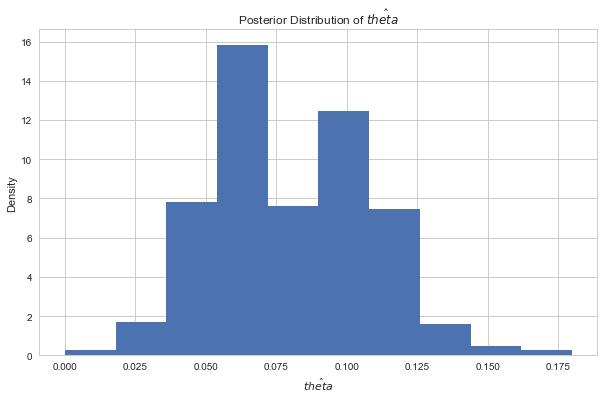

In [22]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of $\hat{theta}$")

plt.show()

**Step 5. Calculate the 90% Bayesian Confidence Interval and interpret it.**

In [23]:
stats.mstats.mquantiles( posterior, [0.05, 0.95])

array([ 0.04,  0.12])

Based on the data, there is a 90% probability that the true proportion is between 4 and 12%.

**Step 6. Using the ROPE of 48 to 52% for a "fair" coin, determine if this coin is fair.**

In [24]:
np.mean((0.48 <= posterior) & (posterior <= 0.52))

0.0

Using the Bootstrap method, we can't really conclude that the probability is *truly* zero but it does seem that it is highly unlikely that coin is fair...

**Discuss**

1. Both coins were determined to not be fair, although certainly one was less fair than the other!
2. Looking at the BCI (Bayesian Confidence Interval), we can see that for $\theta$ = 0.67, the 90% BIC was 0.59-0.74 while for $\theta=0.05$, the 90% BIC was 0.04-0.12. The spread is a lot smaller for the second (8 percentage points) than the original (15 percentage points).
3. This points out a general problem with inference involving proportions. The more extreme the value, the more certain we are about it. But this doesn't particularly make sense. This is an artifact of the floor/ceiling effect (that $p$ cannot be lower than 0 or higher than 1). In fact, in Frequentist statistics, it is generally a rule of thumb that you should not make inferences about $p$ that are in the ranges (0, 0.05) and (0.95, 1.00).

Can you think of an experiment that would test your intuitions about inferences for a rare event?

** Statistical Inference for a single real valued $\theta$**

**Exercise 3**

We can do the same thing for a real valued data (like weights, heights, etc.) and the $\theta$'s that describe such distributions. If we have a normal distribution, there are two such $\theta$s, $\mu$, the mean, and $\sigma$, the standard deviation. Remember, however, that we often think of the dispersion of our data as a percent of the mean or the *coefficient of variation*, v.

**a\. Generate 50 observations from a normal distribution with $\mu=102.7$ and $v=5\%$.**

You should refer to the previous Lab for generating synthetic data from the normal distribution and working with $v$, the coefficient of variation.

In [25]:
np.random.seed([2386431651])

In [26]:
def to_std( mu, v):
    return mu * v

mu = 102.7
v = 0.05
s = to_std( mu, v)
xs = np.random.normal( mu, s, 50)
print( xs[0:20])

[  98.36557147   98.34766079  100.68868897  114.21701087   93.90209963
  101.60105999  106.3281915    93.82837625  103.52905088  102.59634221
   96.57393961  107.33717338  108.60859285  103.07447625  101.85779681
   99.02278237   96.93992197   93.40229053  110.77864541  103.16060406]


**b. What is $\bar{x}$?**

In [27]:
x_bar = np.mean( xs)
print( "sample mean =", x_bar)

sample mean = 102.887714205


**c. Generate the Bootstrap estimate of the posterior distribution of $\bar{x}$.**

In [28]:
posterior = bootstrap_sample( xs, np.mean, 1000)

We can chart the posterior as before. As we will learn in the Visualization module, chart everything.

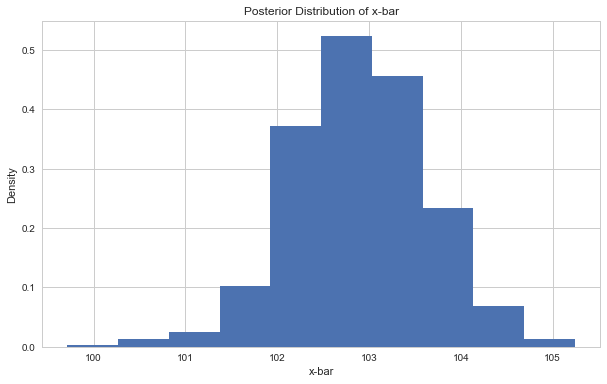

In [29]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "x-bar")
axes.set_title( "Posterior Distribution of x-bar")

plt.show()

**d. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$?**

In [30]:
stats.mstats.mquantiles( posterior, [0.05, 0.95])

array([ 101.68855605,  104.07950503])

There is a 90% probability, given the prior and data, that the value of the mean lies between 101.7 and 104.1.

**e. Define a ROPE of "about 100". What is the probability that $\bar{x}$ falls within the ROPE?.**

In general, defining a ROPE will be problem dependent, but for now I'd say anything in the range 98 to 102 would be "about 100":

In [31]:
np.mean((98.0 <= posterior) & (posterior <= 102))

0.105

There's about an 11% chance the value is "about" 100, *given the data*.

**Exercise 4\. Repeat Steps 1-5 with $v=25\%$.**

In [32]:
np.random.seed([484716248])

**a. Generate synthetic data**

In [33]:
mu = 102.7
v = 0.25
s = to_std( mu, v)
xs = np.random.normal( mu, s, 50)
print( xs[0:20])

[  38.19868365  102.0522274   130.49235161   89.20775923   72.87322846
  115.81595998  128.77960838  116.56456988   64.85007524   81.22192103
  151.5809209    89.52164419   93.72750905  110.29586974  131.7398279
  120.99583239  100.89484478   70.63389597   88.37587876  106.48270981]


**b. What is $\bar{x}$?**

In [34]:
x_bar = np.mean( xs)
print( "sample mean =", x_bar)

sample mean = 100.105155337


**c. Generate the Bootstrap estimate of the posterior distribution of $\bar{x}$.**

In [35]:
posterior = bootstrap_sample( xs, np.mean, 1000)

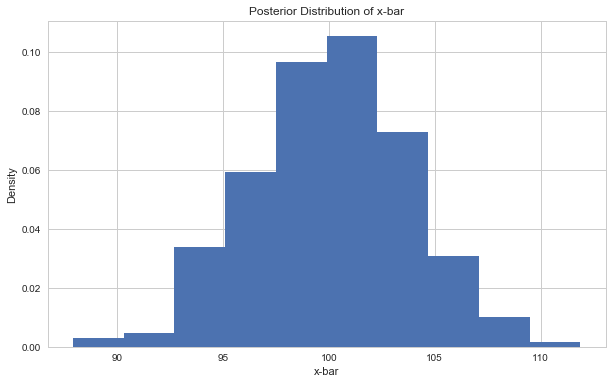

In [36]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "x-bar")
axes.set_title( "Posterior Distribution of x-bar")

plt.show()

This distribution is a lot more spread out than before and the center is not over the actual mean as it was; clearly the larger variance is having an effect on the data we "sampled".

**d. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$?**

In [37]:
stats.mstats.mquantiles( posterior, [0.05, 0.95])

array([  93.87276597,  106.17955077])

There is a 90% probability, based on the data and our prior, that the mean lies between 100.9 and 112.1. Previously, it was 101.7 to 104.1. The increased dispersion of the data has made our ability to "zero in" on the mean more difficult.

**e. Define a ROPE of "about 100". What is the probability that $\bar{x}$ falls within the ROPE?.**

We can use the same ROPE as our idea of "about 100" hasn't changed, anything in the range 98 to 102 would be "about 100":

In [38]:
np.mean((98.0 <= posterior) & (posterior <= 102))

0.40400000000000003

Our confidence in the ROPE has gone from 10.5% to 8.5% probability, given the data, that the mean is in the range 98 to 102.

**Exercise 5\. Repeat Steps #1-5 with $v=25\%$ and 500 samples.**

In [39]:
np.random.seed([484716248])

The key difference here is that although the coefficient of variation is larger in the first experiment we did, the sample size is larger than in the second experiment we did for this problem.

**a. Generate synthetic data**

In [40]:
mu = 102.7
v = 0.25
s = to_std( mu, v)
xs = np.random.normal( mu, s, 500) # increase sample size
print( xs[0:20])

[  38.19868365  102.0522274   130.49235161   89.20775923   72.87322846
  115.81595998  128.77960838  116.56456988   64.85007524   81.22192103
  151.5809209    89.52164419   93.72750905  110.29586974  131.7398279
  120.99583239  100.89484478   70.63389597   88.37587876  106.48270981]


Remember this step is not actually part of inference. This is data that was actually collected. In a few circumstances, you might need to generate data if you don't have access to the raw data.

**b. What is $\bar{x}$?**

In [41]:
x_bar = np.mean( xs)
print( "sample mean =", x_bar)

sample mean = 100.59955165


**c. Generate the Bootstrap estimate of the posterior distribution of $\bar{x}$.**

In [42]:
posterior = bootstrap_sample( xs, np.mean, 1000)

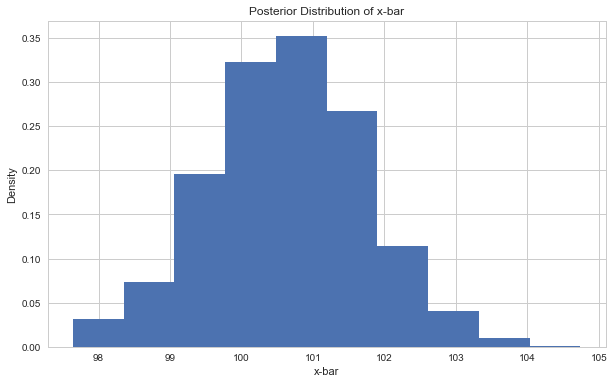

In [43]:
figure = plt.figure(figsize=(10, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 1, 1)

axes.hist( posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "x-bar")
axes.set_title( "Posterior Distribution of x-bar")

plt.show()

Even with 10x more data, we don't really see a bootstrap distribution of the mean that centers over the true mean. An interesting exercise would be, how large a sample *do* you need?

**d. What is the 90% Credible Interval (Bayesian Confidence Interval) for $\hat{\theta}$?**

In [44]:
stats.mstats.mquantiles( posterior, [0.05, 0.95])

array([  98.78207679,  102.40873433])

Our original 90% BCI was 101.7 to 104.1 (for a "true" mean of 102.7) or 104.1 - 101.7 = 2.4 points. After the increase in dispersion, we saw the 90% BCI go to 100.9 to 112.1 or 11.2 points. In this experiment we see that there is a 90% probability, given the data and priors, that the "true" mean lies in the range 102.3 to 106.1 or 3.8 points.

So by increasing the sample size, we have become more confident in our range. It's worth nothing, however, that the true mean is almost out of that range. As mentioned above, it would be interesting to see  how large a sample we would need to make everything work out "perfectly" (small 90% confidence interval that contains the "true" value about dead center).

**e. Define a ROPE of "about 100". What is the probability that $\bar{x}$ falls within the ROPE?.**

We can use the same ROPE as our idea of "about 100" hasn't changed, anything in the range 98 to 102 would be "about 100". Again, where did "about 100" come from? It might be a stakeholder's claim about the number or a manufacturer's claim or you might have arrived at the value analytically and you're trying to do an experiment to verify it.

In [45]:
np.mean((98.0 <= posterior) & (posterior <= 102))

0.89700000000000002

We've gone from 10.5% to 8.5% to 2.7% probability that the mean is "really" 100. This is an interesting way to see how given some hypothesis, "about 100", how the different dispersion of the data and sample size might affect your ability to determine the probability of the data supporting that hypothesis.

** Statistical Inference for a two real valued $\theta$s**

**Exercise 6. Following the text, apply the Bootstrap to make inferences about the difference between $\mu_1$ and $\mu_2$**

1. Data set 1 has $\mu_1=102.7$ and $v_1=10\%$ and 100 observations.
2. Data set 2 has $\mu_2=104.2$ and $v_2=5\%$ and 100 observations.

Pay special consideration to formulating your ROPE for the *difference* between the two parameters and making inferences about it.

In [46]:
np.random.seed([67366372])

**a. Generate synthetic data for using the parameters above.**

Since these are normally distributed variables, we can use the same code as above but we'll prepend `x1_` and `x2_` to each:

In [47]:
x1_mu = 102.7
x1_v = 0.10
x1_s = to_std( x1_mu, x1_v)
x1_xs = np.random.normal( x1_mu, x1_s, 100)
print( x1_xs[0:20])

x2_mu = 104.2
x2_v = 0.05
x2_s = to_std( x2_mu, x2_v)
x2_xs = np.random.normal( x2_mu, x2_s, 100)
print( x2_xs[0:20])

[  86.65515653  106.86455683  105.5059511    90.19616641   86.5877859
   90.12918475  108.38575212  116.6579641    96.06098468  104.93442568
   96.9440422    98.40577501  114.55262737  104.71649347  119.86468334
  109.80606728   94.41162493  109.20607304  105.88867873  107.5255497 ]
[ 101.13218113  101.42802809  109.24308971   97.76896687  105.76715551
   94.63782281  101.17907347   97.19816937  111.02995381  109.33376258
  102.0921322   104.95196563  109.95187336  107.75161807  104.03099953
  105.55803287  119.99709052  110.45999399  116.37465768  106.37881814]


**b. Generate the bootstrap data for each.**

In [48]:
x1_posterior = bootstrap_sample( x1_xs, np.mean, 1000)
x2_posterior = bootstrap_sample( x2_xs, np.mean, 1000)

**b'. Generate difference data. You can do this by simply subtracting, element by element, one bootstrap sample from the other.**

This is just like before. Each element of x{i}\_posterior is an independent estimate of the corresponding $\bar{x_i}$ and we can create a corresponding estimate of the difference:

In [49]:
difference = x1_posterior - x2_posterior

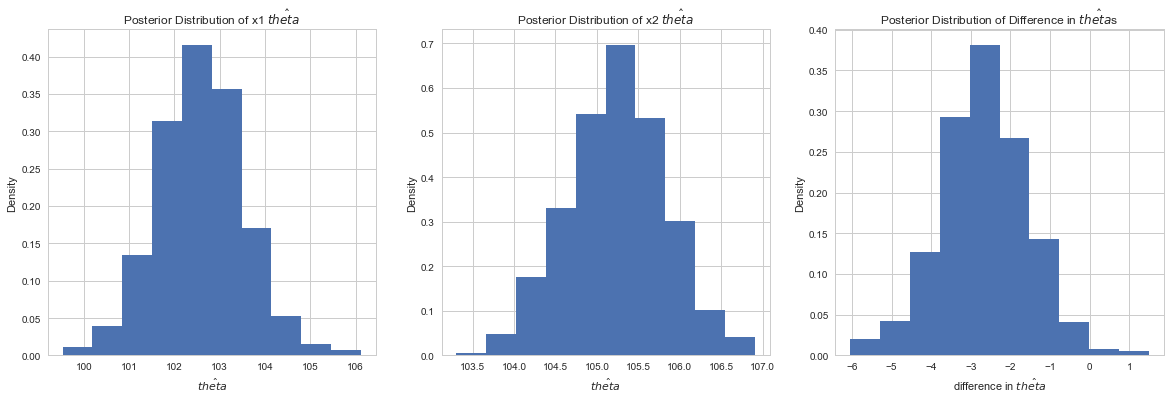

In [50]:
figure = plt.figure(figsize=(20, 6)) # first element is width, second is height.

axes = figure.add_subplot(1, 3, 1)

axes.hist( x1_posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of x1 $\hat{theta}$")

axes = figure.add_subplot(1, 3, 2)

axes.hist( x2_posterior, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "$\hat{theta}$")
axes.set_title( "Posterior Distribution of x2 $\hat{theta}$")

axes = figure.add_subplot(1, 3, 3)

axes.hist( difference, normed=True)
axes.set_ylabel( "Density")
axes.set_xlabel( "difference in $\hat{theta}$")
axes.set_title( "Posterior Distribution of Difference in $\hat{theta}$s")

plt.show()
plt.close()

**c. Calculate the 90% Bayesian Confidence Interval of all three **and interpret them**.

In [51]:
print( "x1 90% BIC:", stats.mstats.mquantiles( x1_posterior, [0.05, 0.95]))
print( "x2 90% BIC:", stats.mstats.mquantiles( x2_posterior, [0.05, 0.95]))
print( "difference 90% BIC", stats.mstats.mquantiles( difference, [0.05, 0.95]))

x1 90% BIC: [ 101.04367398  104.13996608]
x2 90% BIC: [ 104.24744422  106.19421519]
difference 90% BIC [-4.51988262 -0.85385872]


There is a 90% probability, given the data and priors, that the mean value of $x_1$ lies between 101.0 and 104.1. Similarly, there is a 90% probability that the mean value of $x_2$ lies between 104.2 and 106.2. There is a 90% probability that the difference in means between the two data sets lies between -4.5 and -0.9, again, given the data and the priors.

Since we know the real values were 102.7 and 104.2, respectively, we can see how uncertain statistical inference actually is. While all the values are in their respective 90% BIC, the differences are a bit exaggerated. This might be because of the higher variability on $x_1$, the number of data points and the number of bootstrap samples.

**e. Determine a ROPE for the difference**

The typical ROPE for a difference is centered at 0 (unless we expect something else) and includes an interval of values that we would consider "about zero". For this problem, let's take about 1% as that range, so -1 to 1 is our ROPE:

In [52]:
np.mean((-1.0 <= difference) & (difference <= 1.0))

0.067000000000000004

So based on this ROPE, there is only a 6.7% probability, given the data and priors, that the difference between the means of the two data sets if about zero.

## Discussion

1\. Discuss the similarities and differences in your results for Exercises 3-5. What do you think caused them given they all have the same mean? 

This is discussed along the way but the chief differences are probably due to:

1. Sampling variation - this is not an artifact of the synthetic data. In the real world, you will experience sampling variation.
2. Variance - although the means are the same, the variances are different. More disperse data will have more sampling variation and this impedes our ability to make inferences from it.
3. Sample sizes - given the dispersion and the effect on sampling variation, larger samples sizes are the antidote. However, it's not always clear how big a sample size you need. We'll talk about this more in Experimental Design.

2\. Why are we interested in estimating the posterior distribution?

The posterior distribution is the estimate of the probability of all our hypotheses, given the data. We basically want to know, given the data, how believable each hypothesis is. As Sherlock Holmes said, "Once you eliminate the impossible, whatever remains, no matter how improbable, must be the truth." The quote is interesting because P(D|H=h1) may actually *be* very improbable but if it is larger than any other $H=h_i$, it is still the most probable hypothesis (and because of normalization will actually end up with a high probability).

In the case of categorical or discrete outcomes, our hypotheses are simple: either Elvis had an identical twin or he did not. We can just use Bayes Rule with the data. The posterior distribution is easy to calculate. However, in the case of numeric hypotheses about parameter values and descriptive statistics we wish to use as models, there are an infinite number of hypotheses, values for the parameter. Because of this, we have to deal with ranges, either the ROPE or Credible/Confidence intervals or others of our own design and interest.

We can only get these if we calculate the posterior distribution. Still, the posterior distribution of the mean is not different in essence from the posterior distribution of the possibilities, identical twin or not identical twin. It's just because numeric hypotheses involve continuous values that we need to work with ranges.

3\. In the previous Lab, we talked about how Systems Theory related to the variability of a variable. How then is "keeping other things the same" in experimental design or comparison related both to inference and Systems Theory?

Previously we noted that a measurement of a variable has dispersion because there are all these other factors affecting it that we don't model directly and thus we end up with uncertainty. Basically, we measure the outcome of the coin but not all the factors that went into the result; we measure someone's height but not all the factors that went into their height, etc.

Now, especially in the context of comparisons (differences in $\theta$) between two groups, we want to really make sure that the only difference between the two groups is either the intervention or characteristic we're isolating. If we sampled only young women and only old men and presented it as the differences in voting patterns of women and men then we would probably end up with incorrect inferences. This is because we didn't keep all the factors affecting voting patterns the same, except for the one of interest. This is an extreme case. We can still be in trouble if:

1. Our samples are biased (they don't reflect the population at large): young women are overrepresented in our sample and young men are underrepresented; old women are underrepresented and old men are overrepresented.
2. They reflect the population at large but the populations are biased. If there are more young women than young men and more old men than older women, then what we think we are measuring by looking at men v. women might really be old v. young.

In those situations where we want to test the efficacy of an intervention (a new drug or marketing campaign), this is the idea beyond randomized experiments. You randomly assign people (or anything really) to the two (or more) groups and then draw conclusions based the thing (or things) in your control.

## On Your Own

We have only scratched the surface here. What you really want to understand is how variability and the amount of data you have interact especially when looking at *differences* in proportions and means. 

Based on the experiments above, two things tend to happen. First, the bounds of the Credible/Confidence Interval can change. They can get bigger or smaller. And they can contain the "true" value or not or with lesser or greater probility.

Second, the probability of the ROPE changes. Additionally, the probability that a value of interest is contained in the ROPE changes.

What you want to see, under controlled circumstances, is how the sample size and dispersion of the data interact to affect your conclusions.

To do this, you could take examples above and,

1. decrease $v$.
2. increase $v$.
3. decrease observations.
4. increase observations,
5. change the difference in the real $\theta$s both for normal ($\mu$) and bernoulli distributions keeping the other factors fixed to see what differences are and are not detectable with those factors (variability and data).
6. change the ROPE...for example, supposed we *did* believe the mean was "around 102". How would these experiments affect you conclusions.
7. do the same experiment over with a different random seed!

You can write a helper function that does all the things at once to more quickly see what's going on. Additionally, make hypotheses ahead of time about what you think will happen.

*your work here*